Скачаем данные

In [7]:
!wget https://storage.geekclass.ru/images/57eecb91-cd8e-4904-b2cb-e1ddc052de4a.csv -O flights.csv

--2019-10-17 22:16:09--  https://storage.geekclass.ru/images/57eecb91-cd8e-4904-b2cb-e1ddc052de4a.csv
Resolving storage.geekclass.ru (storage.geekclass.ru)... 185.247.118.6
Connecting to storage.geekclass.ru (storage.geekclass.ru)|185.247.118.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9719482 (9,3M) [text/csv]
Saving to: ‘flights.csv’

flights.csv         100%[===================>]   9,27M   973KB/s    in 7,5s    

2019-10-17 22:16:17 (1,23 MB/s) - ‘flights.csv’ saved [9719482/9719482]



In [20]:
import pandas as pd

Загрузите данные из файла ```flights.csv```

In [21]:
data = pd.read_csv("flights.csv")
data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


Наша целевая переменная для классификации: ```Cancelled```, а для регрессии -- ```AirTime``` Сохраним их отдельно и удалим из основных данных

In [22]:
y = data.Cancelled
y_regression = data.AirTime.fillna(0)

data = data.drop(['AirTime','Cancelled'], axis=1)

In [23]:
leaky_features = ["CancellationCode", "Year", "Diverted", "ArrTime", "ActualElapsedTime",
                  "ActualElapsedTime", "ArrDelay", "TaxiIn","TaxiOut", "CarrierDelay",
                  'TailNum', "WeatherDelay", "NASDelay", "SecurityDelay","LateAircraftDelay",'DepTime', 'DepDelay']

```leaky_features``` -- это фичи, которые мы знаем только если знаем целевую. Если модель обучится на них, она не сможет давать предсказания для новых данных.

Удалите эти фичи из данных

In [24]:
data = data.drop(["CancellationCode", "Year", "Diverted", "ArrTime", "ActualElapsedTime",
                  "ActualElapsedTime", "ArrDelay", "TaxiIn","TaxiOut", "CarrierDelay",
                  'TailNum', "WeatherDelay", "NASDelay", "SecurityDelay","LateAircraftDelay",'DepTime', 'DepDelay'], axis=1)

Посмотрите на гистограммы признаков. Можно ли какие-то удалить? Почему? 

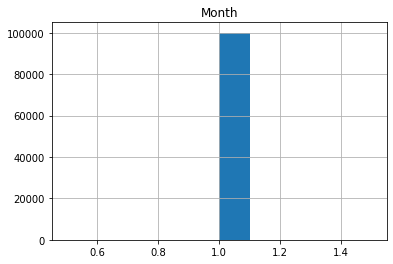

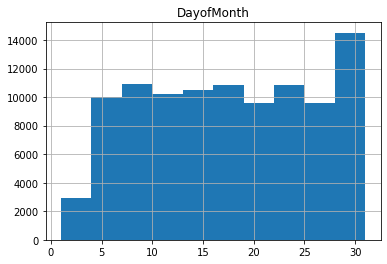

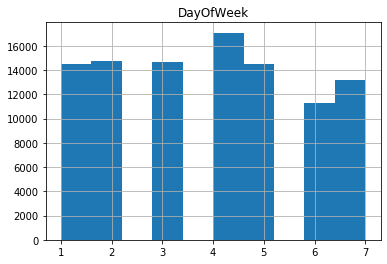

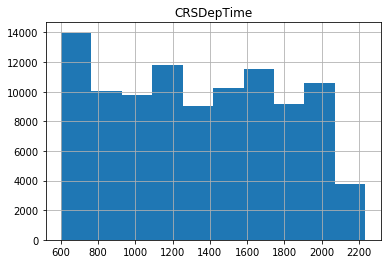

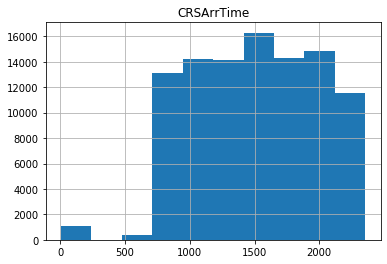

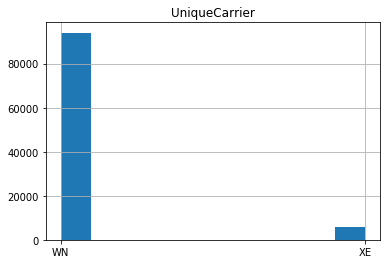

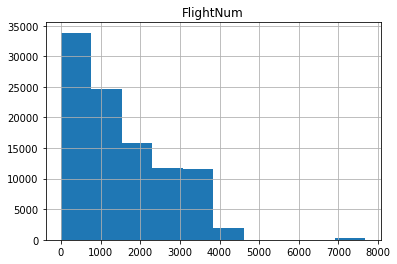

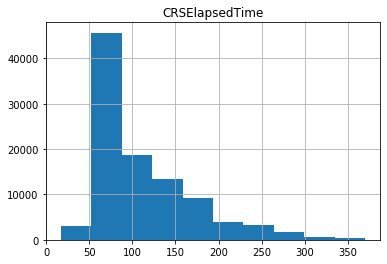

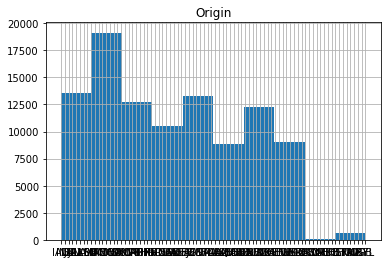

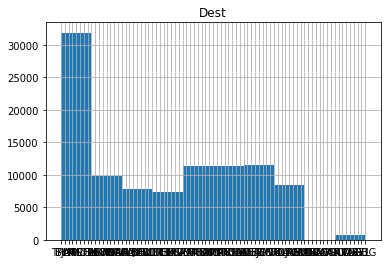

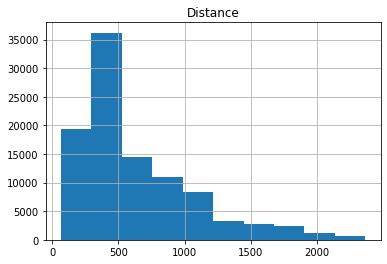

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

for i in data.columns:
    data[i].hist()
    plt.title(i)
    plt.show()    

Удалите бесполезные признаки, выбранные вами на предыдущем шаге

In [26]:
data = data.drop(['Month'], axis = 1)

Переведите все категориальные признаки в числовые. 
Значения признанов, встречающиеся менее 50 раз замените на значение ```Rare```.

Если значение ```Rare``` встречается меньше 50 раз, не надо добавлять его как отдельную колонку.

(если это задание не получается, просто удалите категориальные признаки, но это будет стоить вам баллов)

Подсказка: можете использовать pd.get_dummies (Можно использовать tab и shift+tab для того, чтобы открыть документацию)

In [30]:
for col in data.columns:
    if data[col].dtype == 'object': # Выбираем категориальные признак
        dummies = pd.get_dummies(data[col], prefix = col)
        for z in dummies.columns:
            data[z] = list(dummies[z])
        data = data.drop([col], axis = 1)    
data.head()            

,DayofMonth,DayOfWeek,CRSDepTime,CRSArrTime,FlightNum,CRSElapsedTime,Distance,UniqueCarrier_WN,UniqueCarrier_XE,Origin_ABQ,...,Dest_SJC,Dest_SLC,Dest_SMF,Dest_SNA,Dest_STL,Dest_SYR,Dest_TPA,Dest_TUL,Dest_TUS,Dest_XNA
0,3,4,1955,2225,335,150,810,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,3,4,735,1000,3231,145,810,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,3,4,620,750,448,90,515,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,4,930,1100,1746,90,515,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,4,1755,1925,3920,90,515,1,0,0,...,0,0,0,0,0,0,0,0,0,0


Заполните отсутствующие значения на своё усмторение

In [31]:
import numpy as np

Отшкалируйте (стандартизируйте) данные

In [32]:
from sklearn.preprocessing import StandardScaler
X = data.values.astype('float32')

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [33]:
assert np.isfinite(X).all()

Разделим данные на обучающие/тестовые (НЕ ТРОГАЙТЕ ЭТУ КЛЕТКУ!)

In [34]:
np.random.seed(42)
test_inds = np.arange(X.shape[0])
np.random.shuffle(test_inds)

test_inds = test_inds[:1000]

is_test = np.zeros(X.shape[0], dtype='bool')
is_test[test_inds] = True

X_train = X[~is_test]
X_test = X[is_test]
y_train = y[~is_test]
y_test = y[is_test]
y_regression_train = y_regression[~is_test]
y_regression_test = y_regression[is_test]


Обучите несколько моделей, предсказыаающих ```y```

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression()
model1.fit(X_train, y_train)

model = RandomForestClassifier(n_estimators=10, random_state=537, min_samples_split=100)
model.fit(X_train, y_train)

/home/artur/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=537,
                       verbose=0, warm_start=False)

In [36]:
y_pred = model.predict(X_test)
y_pred1 = model1.predict(X_test)

Area Under ROC: 0.8197979797979799
AreA Under ROC: 0.8215151515151515


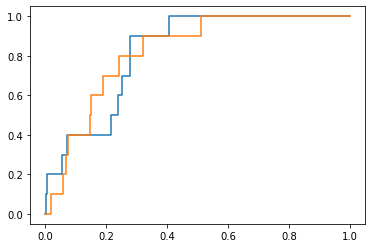

In [37]:
from sklearn.metrics import roc_auc_score, roc_curve

y_test_probability = model.predict_proba(X_test)[:, 1]
y_test_probability1 = model1.predict_proba(X_test)[:, 1]

print("Area Under ROC:", roc_auc_score(y_test, y_test_probability))
print("AreA Under ROC:", roc_auc_score(y_test, y_test_probability1))
fpr, tpr, thresholds = roc_curve(y_test, y_test_probability)
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_test_probability1)
plt.plot(fpr,tpr)
plt.plot(fpr1,tpr1)

Какие метрики измерения качества классификации вы знаете? Что можно сказать об их применимости к данной задаче?

Постройте ROC кривые для обученных моделей. Вычислите roc_auc для этих моделей.

Подсказка: можете использовать sklearn.metrics

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [39]:
def compute_metrics(y_true, y_pred):
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    false_positives = np.sum((y_true == 0) & (y_pred == 1))
    
    #посчитайте количество True Negatives
    true_negatives = np.sum((y_pred == 0) & (y_true == 0))
    
    #посчитайте количество False Negatives
    false_negatives = np.sum((y_pred == 0) & (y_true == 1))
    
    #1e-6 для вычислительной стабильности
    recall = true_positive_rate = true_positives / (true_positives + false_negatives + 1e-6)
    precision = true_positives / (true_positives + false_positives + 1e-6)
    false_positive_rate = false_positives / (false_positives + true_negatives + 1e-6)
    
    return true_positive_rate, false_positive_rate, precision, recall
def compute_metric_plots(y_true, probabilities):
    threshold_history = np.linspace(0, 1 + 1e-6, 200) # 1e-3, чтобы всё точно попало в интервал
    histories = [[], [], [], []]
    for threshold in threshold_history:
        for history, value in zip(histories, compute_metrics(y_true, probabilities >= threshold)):
            history.append(value)
            
    return (threshold_history, *histories)

for threshold in (0.1, 0.25, 0.5):
    tpr, fpr, prec, rec = compute_metrics(y_test, y_test_probability > threshold)
    print("Threshold = {}".format(threshold))
    print("Precision:", prec)
    print("Recall:", rec, end='\n\n')

Threshold = 0.1
Precision: 0.0
Recall: 0.0

Threshold = 0.25
Precision: 0.0
Recall: 0.0

Threshold = 0.5
Precision: 0.0
Recall: 0.0



Продолжайте обучать модели пока не получите roc_auc хотя бы 0.8 на тестовых данных

Постройте график Precision-recall для всех моделей.

Выберете модель и порог, при которых самый большой precision при recall не меньше 0.05

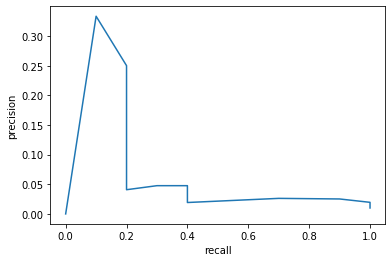

In [40]:
th_hist, tpr_hist, fpr_hist, prec_hist, rec_hist = compute_metric_plots(y_test, y_test_probability)
plt.plot(rec_hist, prec_hist);
plt.xlabel('recall')
plt.ylabel('precision');

Посмотрите на важности признаков по мнениям моделей. Что можно сказать? В каких аэропортах больше всего отменяют рейсы? А в каких меньше?

Обучите модели для регрессии ```y_regression``` (Почти для каждой модели классификации есть аналогичная модель регрессии)

In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

lin_model = LinearRegression()
lin_model.fit(X_train, y_regression_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree.fit(X_train, y_regression_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [45]:
y_regression = lin_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_regression_test, y_regression))
mae = mean_absolute_error(y_regression_test, y_regression)


print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print("--------------------------------------")
print('MAE is {}'.format(mae))

The model performance for testing set
--------------------------------------
RMSE is 11.19819805999103
--------------------------------------
MAE is 5.576854217529297


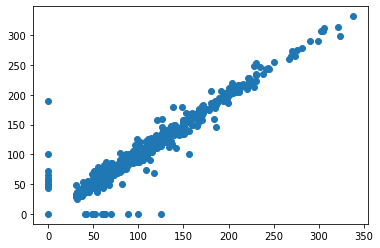

In [51]:
%matplotlib inline
plt.scatter(y_regression_test,y_regression)

In [53]:
y_regression = tree.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_regression_test, y_regression))
mae = mean_absolute_error(y_regression_test, y_regression)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print("--------------------------------------")
print('MAE is {}'.format(mae))

The model performance for testing set
--------------------------------------
RMSE is 13.978590773035743
--------------------------------------
MAE is 6.341


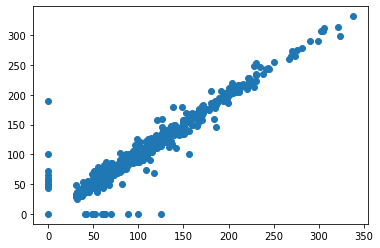

In [54]:
%matplotlib inline
plt.scatter(y_regression_test,y_regression)

Посчитайте MSE для каждой модели. Какая работает лучше всего?

Получите MSE как минимум 200